### Part 1: Load Basic Libraries

In [1]:
import requests
import zipfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Part 2: Load Dataset

In [ ]:
#!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
# Make an HTTP GET request to the URL of the ZIP file

# Download the ZIP file:

url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
response = requests.get(url)

with open("temp.zip", "wb") as f:
    f.write(response.content)
    

In [ ]:
# Extract the ZIP file:
with zipfile.ZipFile("temp.zip", "r") as zip_ref:
    zip_ref.extractall("extracted_file")

In [2]:
csv_file = 'bank/bank-full.csv'
df = pd.read_csv(csv_file, sep=';')

In [3]:
len(df)

45211

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.y = (df.y == 'yes').astype(int)

In [6]:
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

In [7]:
 hwdf = ['age', 'job', 'marital', 'education', 'balance', 'housing',
        'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y']


In [8]:
df = df[hwdf]


In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

### Part 3: Data Preparation


In [10]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [11]:
# Basic information and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(7)
memory usage: 5.0+ MB
None
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mea

In [12]:
numerical = ['age','balance','day','duration','campaign','pdays','previous']
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
print(len(df))
print(len(df_train_full))
print(len(df_test))

45211
36168
9043


In [16]:
len(df_train_full) + len(df_test)

45211

In [17]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [18]:
print(len(df_val))

9042


In [19]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [20]:
len(df_train) + len(df_val) + len(df_test)

45211

In [21]:
y_train = df_train.y.values
y_val = df_val.y.values

In [22]:
del df_train['y']
del df_val['y']

In [23]:
df_train_full.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Part 5: Data Preprocessing

In [24]:
from sklearn.metrics import mutual_info_score

### Part 6: Model Selection & Training

### One-Hot Encoding


In [25]:
from sklearn.feature_extraction import DictVectorizer

In [26]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [27]:
train_dict[0]

{'job': 'technician',
 'marital': 'married',
 'education': 'secondary',
 'housing': 'yes',
 'contact': 'cellular',
 'month': 'may',
 'poutcome': 'failure',
 'age': 37,
 'balance': 807,
 'day': 12,
 'duration': 807,
 'campaign': 3,
 'pdays': 172,
 'previous': 4}

In [28]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [29]:
X_train = dv.transform(train_dict)

In [30]:
X_train.shape

(27126, 47)

In [31]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

### Training Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [39]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [40]:
y_pred = model.predict_proba(X_val)[:, 1]

In [41]:
y = y_pred > 0.5

In [43]:
round((y_val == y).mean(), 3)

0.898

In [44]:
feature_importance = {} # Initialize a dictionary to store final ROC AUC scores

In [45]:
# Split the data into training and test sets
X = df[numerical]  # Use only numerical features
y = df['y']  # Target variable

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
# Loop over each numerical feature to evaluate its ROC AUC score
for feature in numerical:
    X_train_single_feature = X_train[[feature]]     # Reshape the feature for model input (since it should be 2D)
    X_test_single_feature = X_test[[feature]]

In [48]:
 # Train a logistic regression model on the single feature
model = LogisticRegression(solver='liblinear')
model.fit(X_train_single_feature, y_train)

LogisticRegression(solver='liblinear')

In [49]:
# Predict probabilities and compute the initial ROC AUC score
y_pred_prob = model.predict_proba(X_test_single_feature)[:, 1]  # Get probability of the positive class

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:

roc_auc = roc_auc_score(y_test, y_pred_prob)
    

In [52]:
# Check if the AUC is less than 0.5; if so, invert the feature

if roc_auc < 0.5:
    print(f"Inverting feature '{feature}' due to AUC {roc_auc:.4f} < 0.5")
    # Invert the feature values
    X_train_single_feature = -X_train[[feature]]
    X_test_single_feature = -X_test[[feature]]
        
    # Retrain the model with the inverted feature
    model.fit(X_train_single_feature, y_train)
        
    # Recompute the ROC AUC with the inverted feature
    y_pred_prob = model.predict_proba(X_test_single_feature)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
 # Store the final ROC AUC score (either the original or the inverted one)
feature_importance[feature] = roc_auc

# Display the final ROC AUC scores for each feature
print("Feature Importance based on ROC AUC:")
for feature, score in feature_importance.items():
    print(f"{feature}: {score:.4f}")


Feature Importance based on ROC AUC:
previous: 0.6082


In [53]:
# Find the feature with the highest AUC
max_feature = max(feature_importance, key=feature_importance.get)
print(f"\nThe feature with the highest AUC is: {max_feature} with an AUC of {feature_importance[max_feature]:.4f}")


The feature with the highest AUC is: previous with an AUC of 0.6082


In [54]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
model.fit(X_train_single_feature, y_train)


LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [57]:
    # Recompute the ROC AUC with the inverted feature
    y_pred_prob = model.predict_proba(X_test_single_feature)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
 # Store the final ROC AUC score (either the original or the inverted one)
feature_importance[feature] = roc_auc
roc_auc

0.608203368423561

In [85]:
len(df)

45211

In [86]:
# Split the data into train and validation sets
df_train, df_val = train_test_split(df, test_size=0.2, random_state=1)

In [88]:
len(df_train), len(df_val)

(36168, 9043)

In [91]:
# Prepare training and validation datasets
X_train = df_train[numerical + categorical]
y_train = df_train.y

X_val = df_val[numerical + categorical]
y_val = df_val.y

In [93]:
y_train

22468    0
6896     0
28408    0
8481     0
28753    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: y, Length: 36168, dtype: int32

In [94]:
# One-hot encode the categorical features
dv = DictVectorizer(sparse=False)

In [95]:
# Fit and transform the categorical features for the training data
X_train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train_encoded = dv.fit_transform(X_train_dict)


In [96]:
len(X_train_encoded)

36168

In [99]:
# Transform the categorical features for the validation data
X_val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val_encoded = dv.transform(X_val_dict)

In [100]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [101]:
# Get predicted probabilities for the positive class on validation set
y_prob = model.predict_proba(X_val_encoded)[:, 1]

In [115]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

# Initialize lists to store precision and recall for each threshold
thresholds = np.linspace(0.0, 1.0, num=101)  # From 0.0 to 1.0 with step 0.01
precisions = []
recalls = []
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [103]:
y_train.count()

36168

In [104]:
len(y_pred), len(X_test), len(y_val)

(9043, 9043, 9043)

In [105]:
print(X_train.shape, X_val.shape)  # Ensure the shapes are consistent
print(y_train.shape, y_val.shape)

(36168, 14) (9043, 14)
(36168,) (9043,)


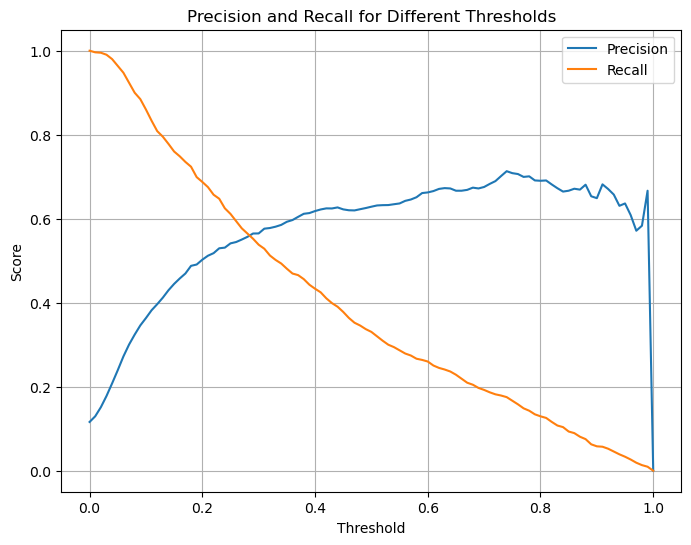

In [127]:
# Plot Precision and Recall as functions of the threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
y_prob.shape

(9043,)

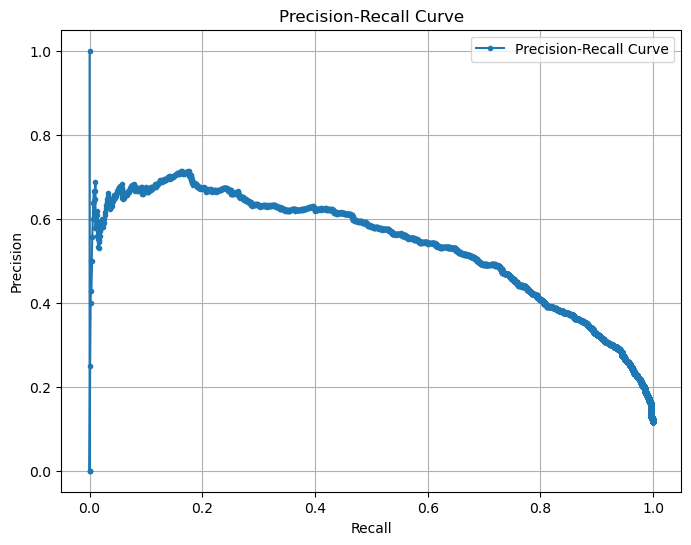

In [116]:
# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

# Step 3: Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
For highly imbalanced datasets, the precision-recall curve and related metrics might offer additional insights, but ROC AUC remains one of the most widely used evaluation metrics in binary classification problems.

In [117]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [118]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

array([1, 0])

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


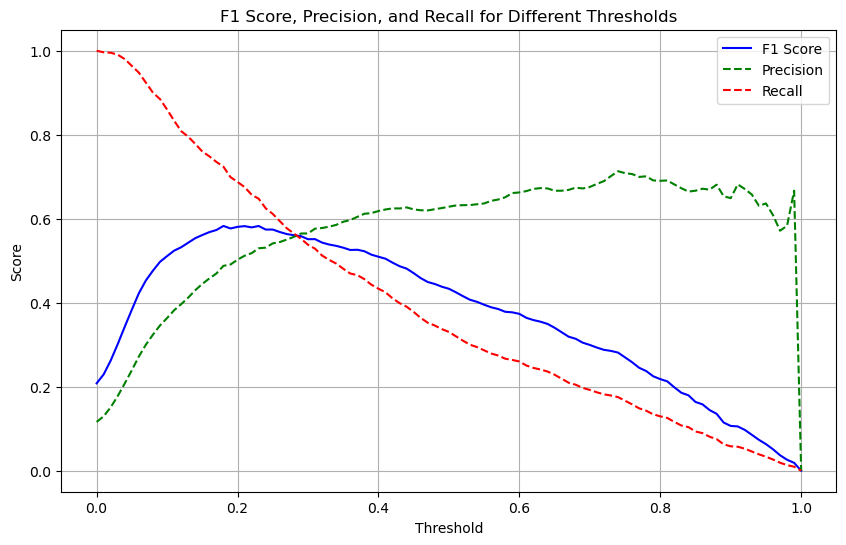

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Step 1: Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_val_encoded)[:, 1]  # Probabilities for class 1

# Step 2: Initialize lists to store precision, recall, and F1 score for each threshold
thresholds = np.linspace(0.0, 1.0, num=101)  # From 0.0 to 1.0 with step 0.01
precisions = []
recalls = []
f1_scores = []

# Step 3: Loop over thresholds and compute precision, recall, and F1 score
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_prob >= threshold).astype(int)
    
    # Compute precision and recall
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    
    # Store precision and recall
    precisions.append(precision)
    recalls.append(recall)
    
    # Compute F1 score (handling cases where P + R is 0)
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0  # Avoid division by zero if both precision and recall are 0
    f1_scores.append(f1)

# Step 4: Plot F1 Score, Precision, and Recall as functions of the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label="F1 Score", color='blue')
plt.plot(thresholds, precisions, label="Precision", color='green', linestyle='--')
plt.plot(thresholds, recalls, label="Recall", color='red', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('F1 Score, Precision, and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [128]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [129]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# Step 1: Prepare the data
df_full_train = df.copy()  # Replace df with your dataset
target = 'y'  # The target column


In [130]:
# Step 2: Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Step 3: Initialize a list to store AUC scores
auc_scores = []

# Step 4: Iterate over different folds
for train_idx, val_idx in kf.split(df_full_train):
    # Split the data into train and validation sets
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    # Prepare feature matrices for train and validation
    X_train = df_train[numerical + categorical]
    y_train = df_train[target]
    
    X_val = df_val[numerical + categorical]
    y_val = df_val[target]
    
    # Step 5: One-Hot Encoding for categorical features using DictVectorizer
    dv = DictVectorizer(sparse=False)
    
    X_train_dict = X_train.to_dict(orient='records')
    X_val_dict = X_val.to_dict(orient='records')
    
    X_train_encoded = dv.fit_transform(X_train_dict)
    X_val_encoded = dv.transform(X_val_dict)
    
    # Step 6: Train the logistic regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_encoded, y_train)
    
    # Step 7: Make predictions on the validation set and calculate AUC
    y_val_prob = model.predict_proba(X_val_encoded)[:, 1]
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Append AUC score to the list
    auc_scores.append(auc)

# Step 8: Compute mean and standard deviation of AUC scores
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

# Step 9: Print the results
print(f"AUC scores across folds: {auc_scores}")
print(f"Mean AUC: {mean_auc:.3f}")
print(f"Standard Deviation of AUC: {std_auc:.3f}")

AUC scores across folds: [0.9062527330461773, 0.8989656125682048, 0.9053544960222328, 0.9124454216120882, 0.9062547711092722]
Mean AUC: 0.906
Standard Deviation of AUC: 0.004


In [131]:
# Step 2: Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Step 3: Define C values to iterate over
C_values = [0.000001, 0.001, 1]

# Step 4: Iterate over each C value and perform cross-validation
for C in C_values:
    auc_scores = []  # To store AUC scores for each fold
    
    for train_idx, val_idx in kf.split(df_full_train):
        # Split the data into train and validation sets
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        # Prepare feature matrices for train and validation
        X_train = df_train[numerical + categorical]
        y_train = df_train[target]

        X_val = df_val[numerical + categorical]
        y_val = df_val[target]

        # Step 5: One-Hot Encoding for categorical features using DictVectorizer
        dv = DictVectorizer(sparse=False)
        
        X_train_dict = X_train.to_dict(orient='records')
        X_val_dict = X_val.to_dict(orient='records')
        
        X_train_encoded = dv.fit_transform(X_train_dict)
        X_val_encoded = dv.transform(X_val_dict)

        # Step 6: Train the logistic regression model with current C value
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_encoded, y_train)

        # Step 7: Make predictions on the validation set and calculate AUC
        y_val_prob = model.predict_proba(X_val_encoded)[:, 1]
        auc = roc_auc_score(y_val, y_val_prob)
        
        # Append AUC score to the list
        auc_scores.append(auc)

    # Step 8: Compute mean and standard deviation of AUC scores for this C value
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)

    # Step 9: Print the results
    print(f"C={C}: Mean AUC = {mean_auc:.3f}, Std AUC = {std_auc:.3f}")

C=1e-06: Mean AUC = 0.705, Std AUC = 0.011
C=0.001: Mean AUC = 0.868, Std AUC = 0.006
C=1: Mean AUC = 0.906, Std AUC = 0.004
